# Basemap

- 딱히 쓸모없을 수도 있지만 matplotlib을 공부하고 있기 때문에 발제함.
- 위도/경도 가 뭔지 알아야함.

### 설치

1. 같이 있는 파일 2개를 다운 받는다 (이때 경로 알고있어야함)
2. 여기에서 말한거 따라한다.(https://m.blog.naver.com/PostView.nhn?blogId=ssdyka&logNo=221215632519&proxyReferer=https%3A%2F%2Fwww.google.co.big52thkr%2F
)

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd 

- Basemap tutorial : http://basemaptutorial.readthedocs.io/en/latest/#

### lat : 위도 // lon : 경도

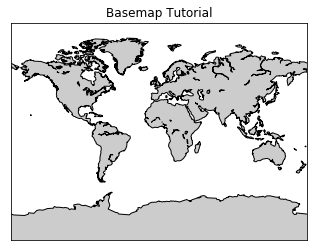

In [3]:
# projection 은 매우 다양함 # 지도의 종류를 결정
m = Basemap(projection = 'mill')

# 이름 그대로 coastline을 그리는 것
m.drawcoastlines()

# 이름 그대로 국가를 채우는 것
m.fillcontinents()

plt.title('Basemap Tutorial')

plt.show()

### - 위도와 경도(x 와 y 축으로 생각하면 될듯)

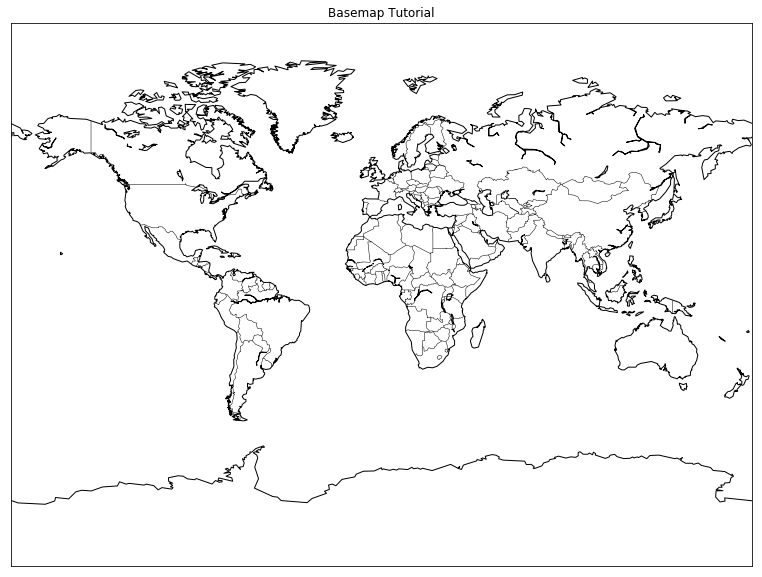

In [4]:
plt.figure(figsize=(16,10))

m = Basemap(projection = 'mill',
           llcrnrlat = -90,     #lowerleftcornerlat -> 즉 원쪽아래 꼭짓점과 오른쪽위 꼭짓점을 찍음
           llcrnrlon = -180,
           urcrnrlat = 90,
           urcrnrlon = 180,
           resolution = 'c') # 지도 디테일하게 하는 정도 # f, h, l, c # f로 갈수록 시간 오래걸림(f는 하지말자..)

m.drawcoastlines()
m.drawcountries()

# 여러가지 옵션들
#m.drawstates(color = 'b')         
#m.drawcounties(color = 'darkred')
#m.etopo()
#m.blumarble()

plt.title('Basemap Tutorial')

plt.show()

# 점찍고 선 그리기

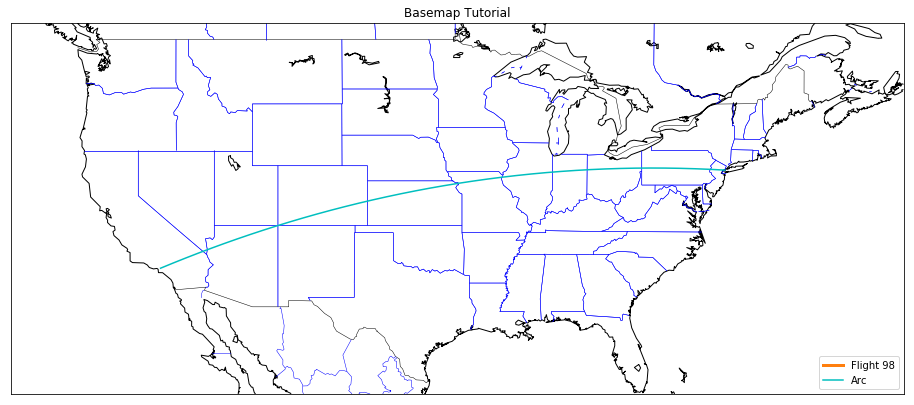

In [5]:
plt.figure(figsize=(16,10))

m = Basemap(projection = 'mill',
           llcrnrlat = 25,  
           llcrnrlon = -130,
           urcrnrlat = 50,
           urcrnrlon = -60,
           resolution = 'l') 

m.drawcoastlines()
m.drawcountries()
m.drawstates(color = 'b')         
#m.drawcounties(color = 'darkred')
#m.etopo()
#m.blumarble()

xs = []
ys = []

NYClat, NYClon = 40.7127, -74.0059  #점찍기
xpt, ypt = m(NYClat, NYClon)

m.plot(xpt,ypt,'ro',alpha=.25)

LAlat, LAlon = 34.05, -118.25
xpt2, ypt2 = m(LAlat, LAlon)

m.plot(xpt2, ypt2, marker = 'o', markersize = 100)

xs.append(xpt)   
ys.append(ypt)
xs.append(xpt2)
ys.append(ypt2)
m.plot(xs, ys, linewidth = 3, label = 'Flight 98') # 두 지점 이어주는 선

m.drawgreatcircle(NYClon, NYClat, LAlon, LAlat, color = 'c', label = 'Arc') # 아치형선

plt.title('Basemap Tutorial')
plt.legend(loc = 4)
plt.show()

# Taxi Trip Data Visualization with Basemap

In [4]:
# Load training data
train = pd.read_csv("train.csv")

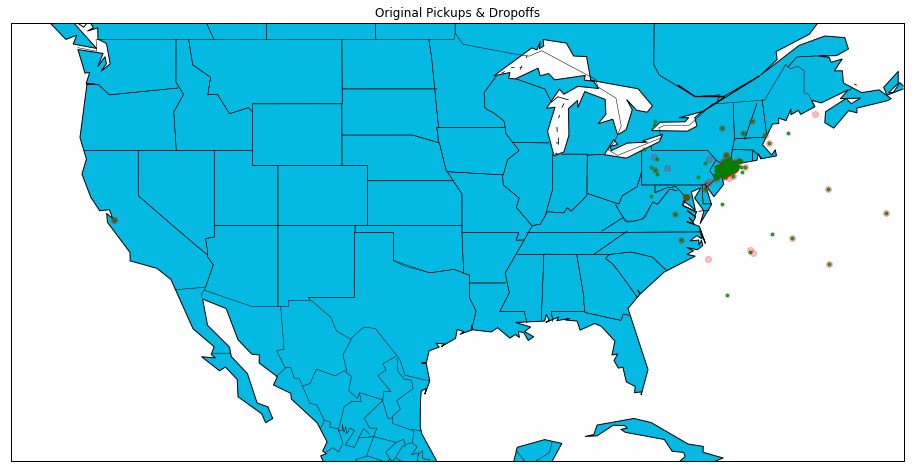

In [31]:
plt.figure(figsize=(16,10))
# Prepare basemap
m = Basemap(projection="mill",llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries() 
m.drawstates()
m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color="#FFFFFF")
parallels = np.arange(0.,81,10.)
meridians = np.arange(0.,360.,10.)

# Pickup coordinates
x,y = m(np.array(train['pickup_longitude']),np.array(train['pickup_latitude']))
m.plot(x,y,'ro',alpha=.25)

# Dropoff coordinates
x,y = m(train['dropoff_longitude'].as_matrix(),train['dropoff_latitude'].as_matrix())
m.plot(x,y,'go',alpha=.75, markersize = 3)

plt.title("Original Pickups & Dropoffs")
plt.show()

# 한국

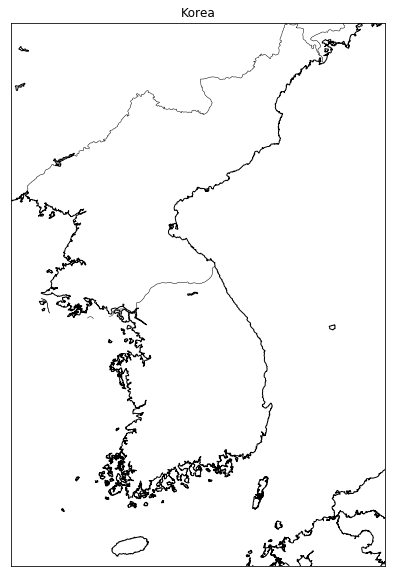

In [4]:
plt.figure(figsize=(16,10))

m = Basemap(projection = 'mill',
           llcrnrlat = 33,    
           llcrnrlon = 124,
           urcrnrlat = 43,
           urcrnrlon = 132,
           resolution = 'h') 

m.drawcoastlines()
m.drawcountries()

plt.title('Korea')

plt.show()

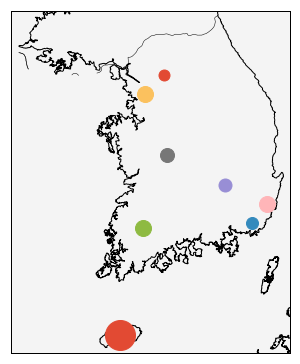

In [7]:
# %% Location data 
plt.style.use('ggplot')
# seoul: 37.5650172,126.8494674
# pusan: 35.1644298,129.0017604
# daegu: 35.8797297,128.4966604
# daegeon: 36.3730796,127.3187604
# Incheon: 37.4645293,126.6043104
# gwangju: 35.1766798,126.7737604
# ulsan: 35.5620297,129.2814604
# JeJu: 33.5038451,126.4949806
seoul = {'lat': [37.5650172+0.1], 'lon': [126.8494674 + 0.5]}
pusan = {'lat': [35.1644298+0.1], 'lon': [129.0017604]}
daegu = {'lat': [35.8797297], 'lon': [128.4966604]}
daegeon = {'lat': [36.3730796], 'lon': [127.3187604 + 0.1]}
Incheon = {'lat': [37.4645293 - 0.1], 'lon': [126.6043104 + 0.4]}
gwangju = {'lat': [35.1766798], 'lon': [126.7737604 + 0.2]}
ulsan = {'lat': [35.5620297], 'lon': [129.2814604]}
JeJu = {'lat': [33.5038451 - 0.1], 'lon': [126.4949806+0.05]}


data = {'lat': [37.5650172, 
                35.1644298, 
                35.8797297, 
                36.3730796,
                (37.4645293-0.1), 
                35.1766798, 
                35.5620297, 
                (33.5038451-0.1)], 
        'lon': [(126.8494674+0.5), 129.0017604, 128.4966604,(127.3187604+0.1),
                (126.6043104+0.3), (126.7737604+0.2), 129.2814604, 126.4949806]}

data = pd.DataFrame(data) 
# %
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(5, 7))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='mill',
              # Projection:
                  # gall
                  # cyl
                  # aeqd'
              llcrnrlon = 124.5,            # left longitude
              urcrnrlon = 129.7,            # right longitude
              urcrnrlat = 38.7,              # upper latitude
              llcrnrlat = 33.1,                # lower latitude
#              llcrnrlon = 124,              # lower-left corner longitude
#              llcrnrlat = 0,               # lower-left corner latitude
#              urcrnrlon = 45,               # upper-right corner longitude
#              urcrnrlat = 73,               # upper-right corner latitude
              # resolution: 
                  # The resolution of he included coastlines, lakes, and so on. 
                  # The options are 
                      # c (crude, the default), l (low), i (intermediate), 
                      # h (high), f (full) or None.
              resolution = 'h', 
              # area_thresh: 
                  # The threshold under what no coast line or lake will be drawn. 
                  # Default 10000,1000,100,10,1 for
              area_thresh = 100)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
#map.fillcontinents(color = '#888888')
# map.fillcontinents(color='#7b8e99', lake_color='#FFFFFF')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')
#map.drawmapboundary(fill_color='#FFFFFF')

# Define our longitude and latitude points

# We have to use .values because of a wierd bug when passing pandas data

# to basemap.
x, y = map(seoul['lon'], seoul['lat'])
map.plot(x, y, 'o', markersize = 11) # markersize

x, y = map(pusan['lon'], pusan['lat'])
map.plot(x, y, 'o', markersize = 12) # markersize 

x, y = map(daegu['lon'], daegu['lat'])
map.plot(x, y, 'o', markersize = 13) # markersize 

x, y = map(daegeon['lon'], daegeon['lat'])
map.plot(x, y, 'o', markersize = 14) # markersize 

x, y = map(Incheon['lon'], Incheon['lat'])
map.plot(x, y, 'o', markersize = 16) # markersize 

x, y = map(gwangju['lon'], gwangju['lat'])
map.plot(x, y, 'o', markersize = 16) # markersize 

x, y = map(ulsan['lon'], ulsan['lat'])
map.plot(x, y, 'o', markersize = 16) # markersize 

x, y = map(JeJu['lon'], JeJu['lat'])
map.plot(x, y, 'o', markersize = 30) # markersize 

# Show the map
plt.show()

